In [2]:
import pandas as pd
import numpy as np
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import plotly_express as px
#import geopandas as gpd
import geopy as gp
from geopy.geocoders import GoogleV3
from tqdm import tqdm
import datapane as dp
import plotly.graph_objects as go
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [3]:
df = pd.read_csv('japan_df_province')

In [4]:
df['Date'] = pd.to_datetime(df['Captured Time'], format='%Y-%m-%d %H:%M:%S')
df.drop('Captured Time', axis=1, inplace=True)

In [5]:
df = df[df['Date'].notnull()]
df = df.sort_values('Date')

In [6]:
df = df.groupby([pd.Grouper(key='Date', freq='D'), 'Province']).mean().reset_index()

In [7]:
df

,Date,Province,Unnamed: 0.1,Unnamed: 0,Latitude,Longitude,Value,Height
0,2012-12-02,Fukushima Prefecture,1.859024e+07,3.580331e+07,37.508102,139.932585,33.000000,1.000000
1,2014-10-20,Fukushima Prefecture,2.535119e+07,3.573175e+07,37.768030,140.475669,313.333333,0.000000
2,2014-10-20,Miyagi Prefecture,2.682874e+07,3.573175e+07,37.930088,140.762162,350.000000,0.000000
3,2015-07-09,no data,7.848781e+06,3.558452e+07,35.659491,139.727850,19.767742,92.000000
4,2015-07-10,no data,7.848267e+06,3.558401e+07,35.659491,139.727850,18.854352,92.000000
...,...,...,...,...,...,...,...,...
13653,2022-03-19,Fukushima Prefecture,1.747144e+07,5.076029e+02,37.470229,140.650578,34.527495,117.360489
13654,2022-03-19,Kagoshima Prefecture,2.956295e+05,5.022500e+02,31.833193,130.301922,20.687500,13.000000
13655,2022-03-19,Nara Prefecture,4.164816e+06,5.149348e+02,34.488300,136.165000,31.086957,535.000000
13656,2022-03-19,Shiga Prefecture,5.057522e+06,5.049167e+02,35.268280,136.249300,15.458333,100.000000


In [8]:
df.rename(columns = {'Date':'ds', 'Value':'y'}, inplace = True)

In [9]:
df = df[df['Province'] == 'Fukushima Prefecture']

In [10]:
df = df.drop(['Province','Unnamed: 0.1', 'Unnamed: 0', 'Latitude','Longitude','Height'], axis=1)

In [11]:
df

,ds,y
0,2012-12-02,33.000000
1,2014-10-20,313.333333
51,2015-08-26,112.401408
53,2015-08-27,111.145695
55,2015-08-28,116.491031
...,...,...
13629,2022-03-15,37.577255
13635,2022-03-16,36.335479
13641,2022-03-17,34.560340
13647,2022-03-18,36.174770


In [12]:
train = df[df['ds'] <= pd.to_datetime("2020-12-31", format='%Y-%m-%d')]
test = df[df['ds'] > pd.to_datetime("2020-12-31", format='%Y-%m-%d')]

In [20]:
Y_test = test[['ds','y']].copy()
X_test = test[['ds']].copy()

In [21]:
Y_test

,ds,y
11040,2021-01-01,70.186804
11047,2021-01-02,70.988551
11054,2021-01-03,70.932292
11061,2021-01-04,71.669818
11068,2021-01-05,71.686158
...,...,...
13629,2022-03-15,37.577255
13635,2022-03-16,36.335479
13641,2022-03-17,34.560340
13647,2022-03-18,36.174770


In [16]:
m = Prophet()
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/kamil/Documents/tensorflow-test/env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.48786


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4961.96     0.0158885       254.647           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     190       4979.43   0.000160062       142.091   1.177e-06       0.001      272  LS failed, Hessian reset 
     199       4979.88   0.000309457       119.041           1           1      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     260       4987.75   0.000708474        201.79   1.869e-06       0.001      386  LS failed, Hessian reset 
     299       4989.99    0.00254414       133.191           1           1      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4992.35    0.00093969       82.7807           1           1      559   
    Iter      log prob        ||dx||      ||grad||       alpha

In [17]:
# future = m.make_future_dataframe(periods=365)
# future.tail()

In [18]:
forecast = m.predict(X_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/Users/kamil/Documents/tensorflow-test/env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/kamil/Documents/tensorflow-test/env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
438,2022-03-15,71.797092,45.615509,96.668810
439,2022-03-16,71.329902,45.087761,97.244157
440,2022-03-17,71.080879,44.718892,97.537483
441,2022-03-18,71.856171,45.212869,98.433808
442,2022-03-19,72.057908,45.072906,97.423454


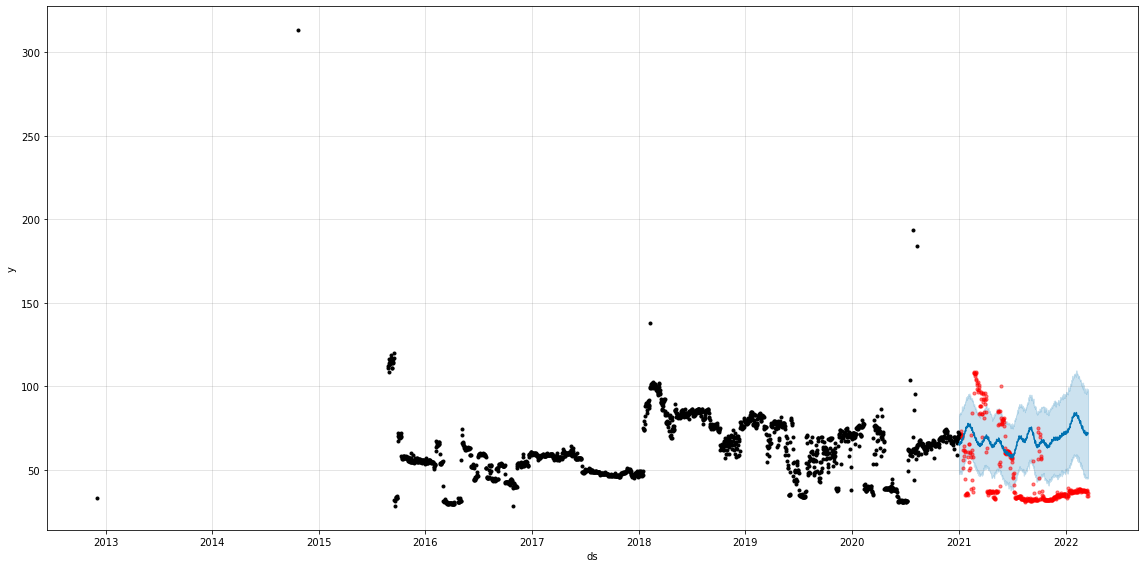

In [56]:
fig1 = m.plot(forecast, figsize=(16,8))
plt.scatter(Y_test['ds'],Y_test['y'], color='red', s=10, alpha = 0.5)
plt.savefig("prophet_predict.pdf")

/Users/kamil/Documents/tensorflow-test/env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/kamil/Documents/tensorflow-test/env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


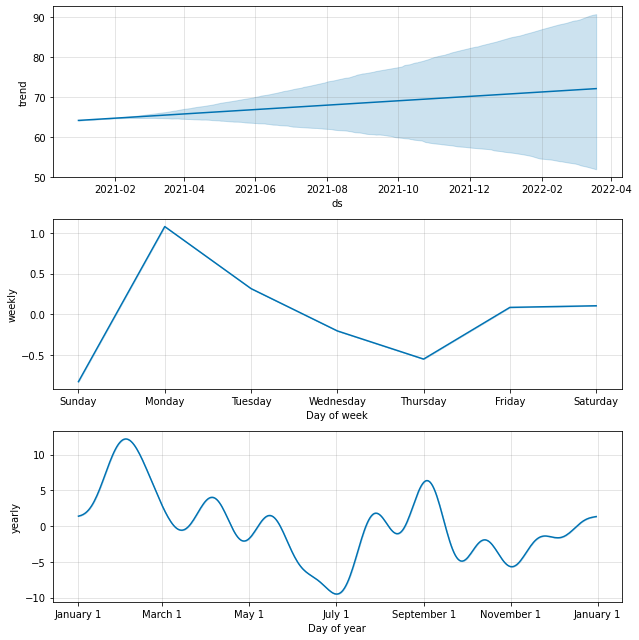

In [35]:
fig2 = m.plot_components(forecast)

In [47]:
plot_components_plotly(m, forecast)

/Users/kamil/Documents/tensorflow-test/env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/kamil/Documents/tensorflow-test/env/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

